# Part 1

## Brief introduction to Images



*   An image is a multi-dimensional array that is made up of pixels.
*   Each pixel takes an integer value, typically ranging from 0 to 255. These values correspond to information regarding the color and brightness.
*   The shape of the image can be represented as (height x width x channels). Grayscale images have just 1 channel and the shape of a grayscale image would be just (H, W). In the case of RGB images, we have 3 channels (one each for Red, Green and Blue) and so the shape of the image would be (H, W, 3)




## Images as Numpy Arrays

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Visualizing a 3 x 3 (9 pixels) Numpy array as a grayscale image

In [ ]:
np_image_1 = np.array([[0,0,0],
                       [0,255,0],
                       [0,0,0]])

print(np_image_1)

[[  0   0   0]
 [  0 255   0]
 [  0   0   0]]


In [ ]:
print("(H, W):", np_image_1.shape)

(H, W): (3, 3)


*   A pixel value of 0 would be represented as black
*   A pixel value of 255 would be represented as white

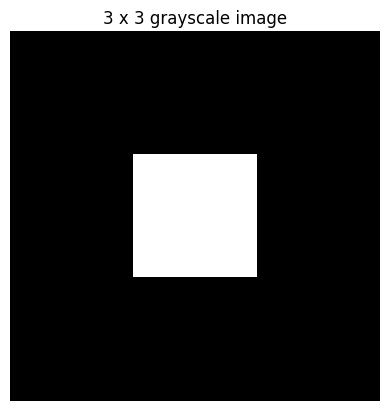

In [ ]:
plt.imshow(np_image_1, cmap='gray')
plt.title('3 x 3 grayscale image')
plt.axis('off')
plt.show()

### Visualize a 100 x 100 (10000 pixels) Numpy array as a grayscale image

In [ ]:
np_image_2 = np.random.randint(0, 256, (100, 100))
print("(H, W):", np_image_2.shape)

(H, W): (100, 100)


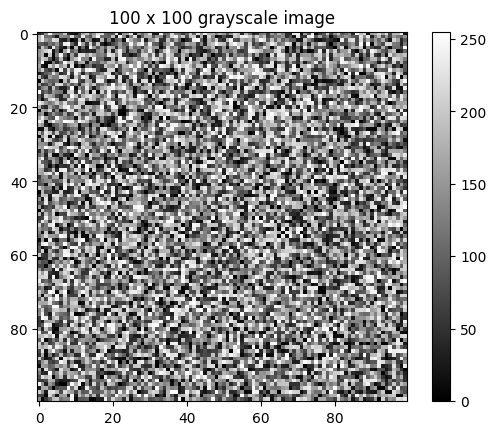

In [ ]:
plt.imshow(np_image_2, cmap='gray')
plt.title("100 x 100 grayscale image")
plt.colorbar()
plt.show()

### Visualize a 100 x 100 X 3 Numpy array as an RGB image

In [ ]:
np_image_3 = np.random.randint(0, 256, (100, 100, 3))
print("(H, W, C):", np_image_3.shape)

(H, W, C): (100, 100, 3)


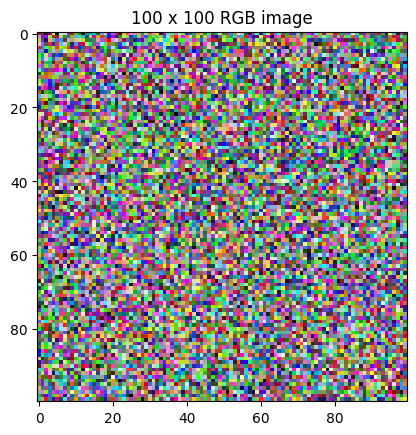

In [ ]:
plt.imshow(np_image_3)
plt.title("100 x 100 RGB image")
plt.show()

## Loading and viewing an Image

### Using PIL to open an uploaded image and view it using matplotlib

In [ ]:
from PIL import Image

In [ ]:
image_path = '/content/ferrari.jpg'

uploaded_image = Image.open(image_path)

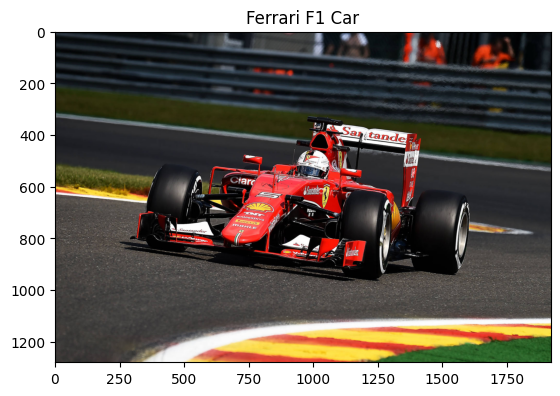

In [ ]:
plt.imshow(uploaded_image)
plt.title('Ferrari F1 Car')
plt.show()

In [ ]:
type(uploaded_image)

PIL.JpegImagePlugin.JpegImageFile

### Convert the image to Numpy array

In [ ]:
image_array = np.array(uploaded_image)

In [ ]:
type(image_array)

numpy.ndarray

In [ ]:
print("(H, W, C):", image_array.shape)

(H, W, C): (1280, 1920, 3)


In [ ]:
print('The min pixel value is',np.min(image_array))
print('The max pixel value is',np.max(image_array))

The min pixel value is 0
The max pixel value is 255


#### Visualize the same image but as a Numpy Array

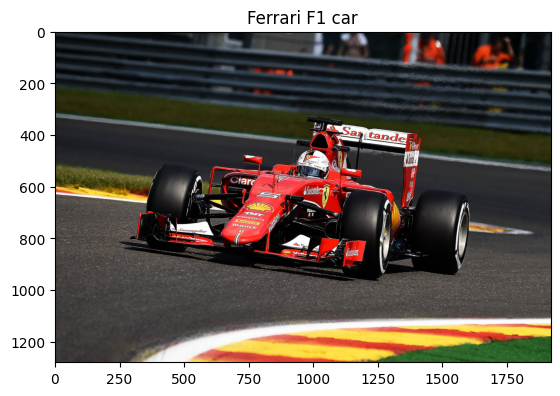

In [ ]:
plt.imshow(image_array)
plt.title('Ferrari F1 car')
plt.show()

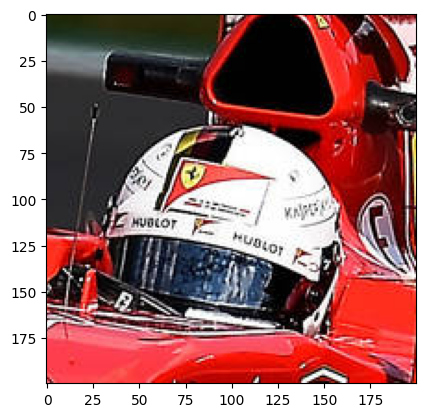

In [ ]:
# Extract and visualize the part of the image containing the driver of the car
plt.imshow(image_array[400:600,900:1100,])

#### Observing the three channels in the Image

In [ ]:
#Each channel will be a matrix of shape (H, W)
print('Shape of channel 1:',image_array[:,:,0].shape)
print('Shape of channel 2:',image_array[:,:,1].shape)
print('Shape of channel 3:',image_array[:,:,2].shape)

Shape of channel 1: (1280, 1920)
Shape of channel 2: (1280, 1920)
Shape of channel 3: (1280, 1920)


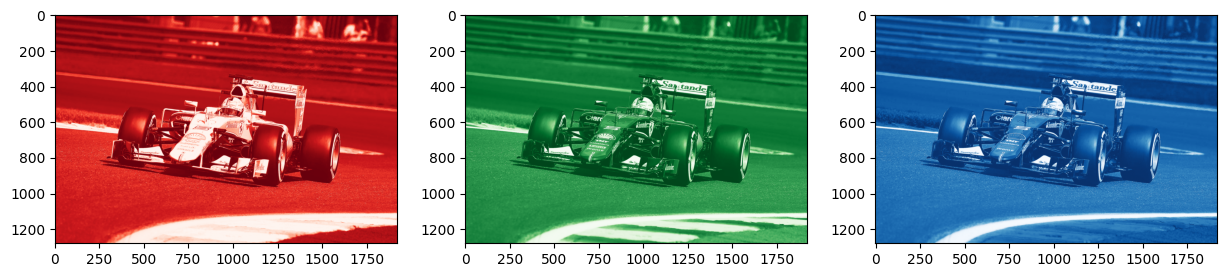

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,15))

axes[0].imshow(image_array[:,:,0],cmap='Reds_r')
axes[1].imshow(image_array[:,:,1],cmap='Greens_r')
axes[2].imshow(image_array[:,:,2],cmap='Blues_r')

#### Convert the image to grayscale

In [ ]:
# The original image is converted to grayscale and then read as a numpy array
gray_uploaded_image = uploaded_image.convert("L")
gray_image_array = np.array(gray_uploaded_image)

print(gray_image_array.shape)

(1280, 1920)


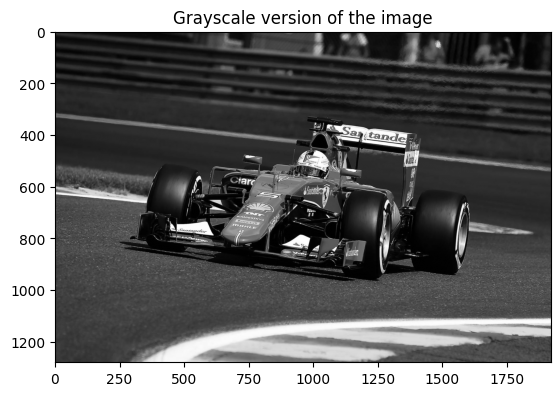

In [ ]:
plt.imshow(gray_image_array, cmap='gray')
plt.title('Grayscale version of the image')
plt.show()

## Observations

* Images can be looked at as Numpy arrays and can be manipulated accordingly
* The type of the image would determine its shape. If required, an RGB image can be converted to Grayscale, thus reducing some computational load in downstream tasks

# Dataset Structure

A [dataset](https://www.kaggle.com/datasets/aleemaparakatta/cats-and-dogs-mini-dataset) was downloaded from Kaggle. This is present as a zip file. Within it are two directories named cats_set and dogs_set, each of which contain images belonging to the respective categories





In [ ]:
# The directories containing the images are extracted from the zip file
import os

!mkdir dataset
!mv archive.zip dataset
!cd dataset && unzip archive.zip
!rm /content/dataset/archive.zip

<pre>content/dataset/
|--------cats_set/
|          |-----\cat.4001.jpg
|          |-----\cat.4002.jpg
|--------dogs_set/
|          |-----\dog.4001.jpg
|          |-----\dog.4002.jpg
</pre>

# Part 2

Problem
* The images are present within the directories and they currently have no labels
* The images are of different resolutions (H & W are different for the images)

Possible approach
* Loop through all images and store as an array. The names of the directory can be stored as corresponding label
* Resize all images to the same size and flatten to have them in a single dimension. These transformations will depend on the models being used and the specific usecases

In [ ]:
def create_image_and_labels(data_dir, target_size=(200,200)):

  # Array for images and labels respectively
  images = []
  labels = []

  class_names = os.listdir(data_dir)

  # Loop through all directories
  for class_name in class_names:
    class_dir_path = os.path.join(data_dir, class_name)

    #Loop through all images
    for image_name in os.listdir(class_dir_path):
      image_path = os.path.join(class_dir_path, image_name)

      #Open image using PIL, resize and convert to grayscale
      image = Image.open(image_path).resize(target_size).convert('L')

      #Convert to numpy array, flatten and normalize
      resized_image = np.array(image).flatten()/255

      images.append(resized_image)
      labels.append(class_name)

  return np.array(images), np.array(labels)

In [ ]:
images, labels = create_image_and_labels('/content/dataset')

There are a total of 1000 images. Each image was *resized* to (200,200) and converted to *grayscale* followed by *flattening*. This makes each image have a dimension of 40000

In [ ]:
images.shape

(1000, 40000)

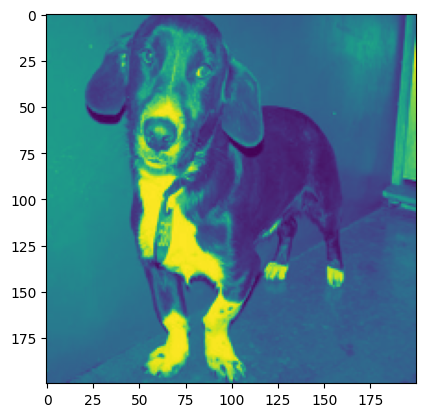

In [ ]:
# Visualizing one of the images in our dataset. The transformations are reversed for the sake of visualizing
plt.imshow(images[0].reshape(200,200)*255)
plt.show()

# Part 3

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
# https://docs.pytorch.org/vision/0.8/transforms.html#torchvision.transforms.Compose

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

In [ ]:
# https://docs.pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html#torchvision.datasets.ImageFolder

dataset = datasets.ImageFolder(root="/content/dataset", transform=transform)

In [ ]:
# https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

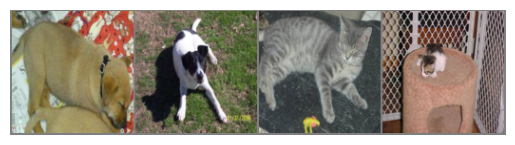

Labels: tensor([1, 1, 0, 0])


In [ ]:
#For visualizing, we undo the transformation
def imshow(img_tensor):
    img = img_tensor / 2 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Get one batch
dataiter = iter(dataloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
print("Labels:", labels)